**Team Name:** Sigmoid Freud

Zoe Harrington

Sudeshna Bora

Konstantine Tsafatinos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

**7.1 Simulated Annealing**

**Initialization and Optimization**

In [2]:
def energy_function(W, s, i = -1):
    N = len(s)
    temp = 0
    if i == -1:
        for i in range(N):
            for j in range(N):
                temp += W[i, j] * s[i] * s[j]
    else:
        for j in range(N):
            temp += W[i, j] * s[i] * s[j]    
    return -0.5*temp

def probability(beta, del_E):
    return 1 / (1 + np.exp(beta*del_E))

In [3]:
N = 6
t_max = 200

In [4]:
W = np.random.random(size=(N, N))
W = (W + W.T) / 2 
np.fill_diagonal(W,0)
s = np.random.choice([-1, 1], N)
M = 1

In [5]:
def stimulated_annealing_optimization(M, t_max, s, W, beta):
    temperature = np.zeros(t_max)
    energy = np.zeros(t_max)
    for t in range(t_max):
        for index in range(M):
            n = len(s)
            i = np.random.randint(0, n)
            del_e = -2*energy_function(W, s, i)
            p_flip = probability(beta, del_e)
            if np.random.rand() < p_flip:
                s[i] *= -1

        temperature[t] = 1 / beta
        energy[t] = energy_function(W, s)
        beta *= tau
    return temperature, energy

In [6]:
beta = 1.01
tau = 1.06

In [7]:
temperature_1, energy_1 = stimulated_annealing_optimization(1, t_max, np.copy(s), W, np.copy(beta))
temperature_20, energy_20 = stimulated_annealing_optimization(20, t_max, np.copy(s), W, np.copy(beta))


**Visualization**

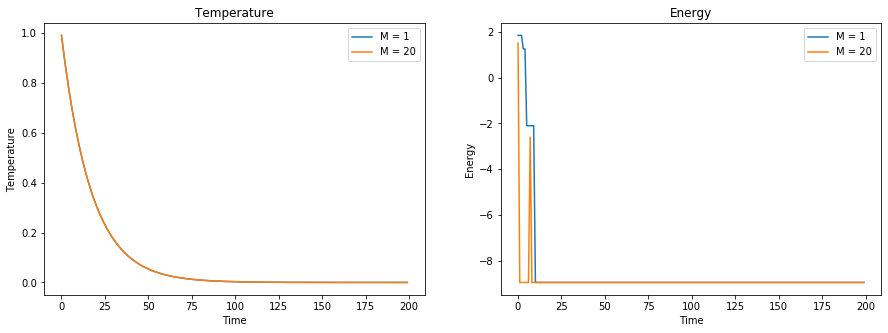

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.sca(axs[0])
plt.plot(temperature_1, label = 'M = 1')
plt.plot(temperature_20, label = 'M = 20')
plt.legend()
plt.title('Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.sca(axs[1])
plt.plot(energy_1, label = 'M = 1')
plt.plot(energy_20, label = 'M = 20')
plt.legend()
plt.title('Energy')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.show()

In [9]:
states = itertools.product([-1,1], repeat=6)
states = np.array(list(states))
states.shape

(64, 6)

In [10]:
n = states.shape[0]
energies = np.zeros(n)

for i,state in enumerate(states):
    energies[i] = energy_function(W, state)

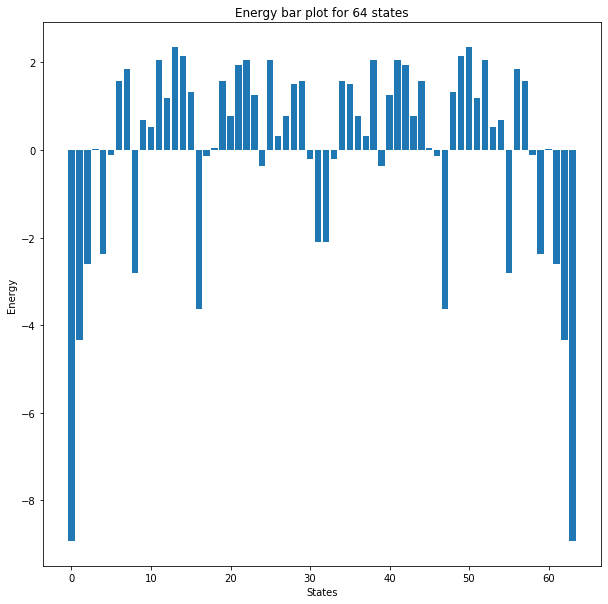

In [11]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(n), energies)
plt.title('Energy bar plot for 64 states')
plt.ylabel('Energy')
plt.xlabel('States')
plt.show()

In [12]:
betas = [0.05, 0.5, 1.5 , 2.5]

In [13]:
def probabilities(beta):
    probabilities = np.zeros(n)
    for i, state in enumerate(states):
        probabilities[i] = np.exp(-(beta*energy_function(W, state)))
        z = np.sum(np.exp(-energies*beta))
    return probabilities/z

In [14]:
prob_005 = probabilities(0.05)
prob_05 = probabilities(0.5)
prob_15 = probabilities(1.5)
prob_25 = probabilities(2.5)

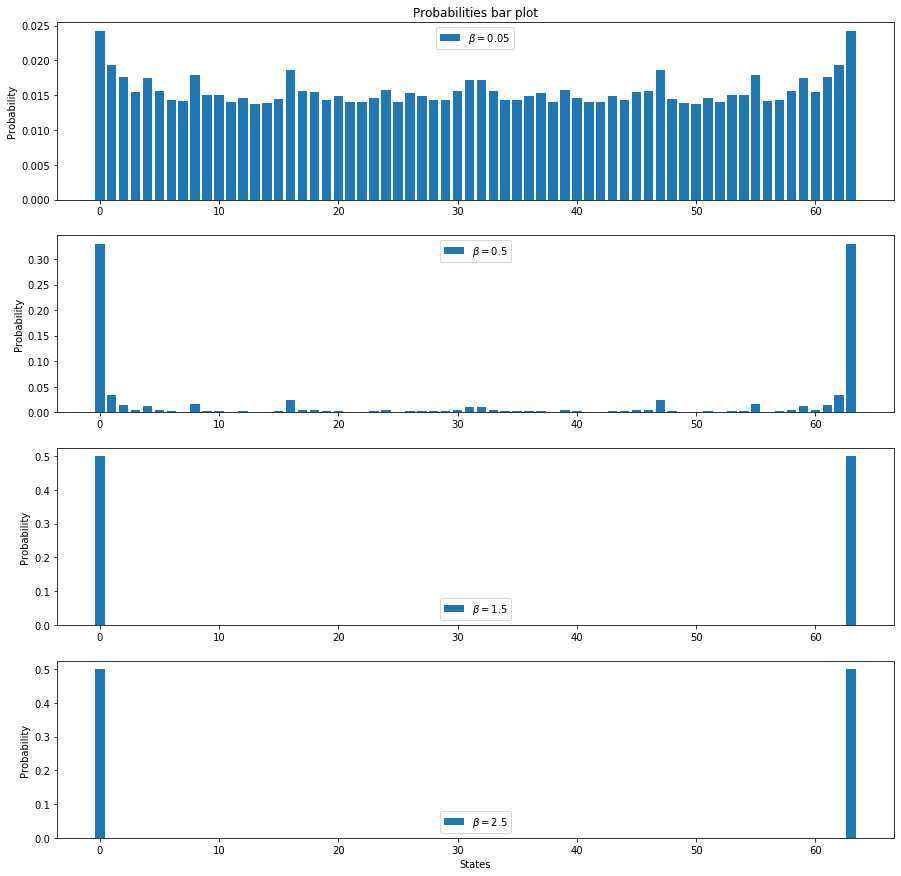

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

plt.sca(axs[0])
plt.bar(np.arange(n), prob_005,label = r'$\beta = 0.05$')
plt.ylabel('Probability')
plt.title('Probabilities bar plot')
plt.legend()

plt.sca(axs[1])
plt.bar(np.arange(n), prob_05, label = r'$\beta = 0.5$')
plt.ylabel('Probability')
plt.legend()

plt.sca(axs[2])
plt.bar(np.arange(n), prob_15, label = r'$\beta = 1.5$')
plt.ylabel('Probability')
plt.legend()

plt.sca(axs[3])
plt.bar(np.arange(n), prob_25, label = r'$\beta = 2.5$')
plt.ylabel('Probability')
plt.xlabel('States')
plt.legend()

plt.show()

**Exercise 7.2: Mean-Field Annealing**

**A Initialization and B Optimization**

In [16]:
t_max = 200
beta = 0.05
tau = 1.06
N = 6
s = np.random.choice([-1., 1.], N)
eps = 0.000001

In [17]:
temperatures = np.zeros(t_max)
energies = np.zeros(t_max)

In [18]:
def energy_mean_field_annealing(N, W, s, index):
    temp = 0
    for j in N:
        temp += W[index, j] * s[j]
    
    return -temp

In [19]:
e = np.zeros_like(s)
for i in range(N):
    n_i = list(range(N)) 
    n_i.remove(i)
    e[i] = energy_mean_field_annealing(n_i, W, s, i)

In [20]:
for t in range(t_max):
    dist = 1000000000
    while dist >= eps:
        e_old = np.copy(e)
        for i in range(N):
            n_i = list(range(N))
            n_i.remove(i)
            e[i] = energy_mean_field_annealing(n_i, W, s, i)
            s[i] = np.tanh(-beta * e[i])
        dist = np.linalg.norm(e - e_old)
    
    temperatures[t] = 1 / beta
    energies[t] = energy_function(W, s)
    beta *= tau

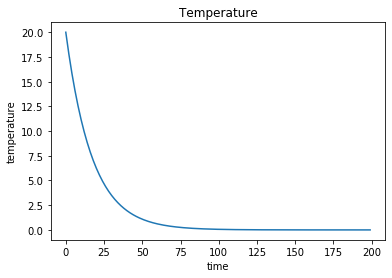

In [23]:
plt.plot(temperatures)
plt.title('Temperature')
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

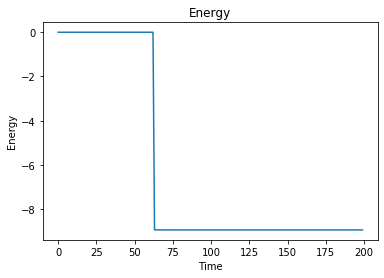

In [24]:
plt.plot(energies)
plt.title('Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()